In [94]:
# Agrupar los datos acorde al rango que se quiere analizar, en este caso los robos con violencia ocurridos en CABA en el año 2021

año21 = td[td['fecha'].dt.year == 2021]
año21 = año21[año21['tipo'] == "Robo (con violencia)"]
año21 = año21.groupby('fecha',as_index=False)['victimas'].sum()

In [96]:
# La siguiente funcion nos brinda información estadistica sobre la variable a estudiar.

def getdistprops(seriestotest):
  out = {}
  normstat, normpvalue = scistat.shapiro(seriestotest)
  if (not math.isnan(normstat)):
    out['normstat'] = normstat
    if (normpvalue>=0.05):
      out['normpvalue'] = str(round(normpvalue, 2)) + ": Accept Normal"
    elif (normpvalue<0.05):
      out['normpvalue'] = str(round(normpvalue, 2)) + ": Reject Normal"
  out['mean'] = seriestotest.mean()
  out['median'] = seriestotest.median()
  out['std'] = seriestotest.std()
  out['kurtosis'] = seriestotest.kurtosis()
  out['skew'] = seriestotest.skew()
  out['count'] = seriestotest.count()
  out['qr1'] = seriestotest.quantile(0.25)
  out['qr3'] = seriestotest.quantile(0.75)
  out['iqr'] = out['qr3']-out['qr1']
  return out

In [98]:
dist = getdistprops(año21.victimas)
pprint.pprint(dist)

{'count': 365,
 'iqr': 27.0,
 'kurtosis': 0.19565874714882536,
 'mean': 122.8082191780822,
 'median': 125.0,
 'normpvalue': '0.0: Reject Normal',
 'normstat': 0.9835566878318787,
 'qr1': 110.0,
 'qr3': 137.0,
 'skew': -0.4902013949876709,
 'std': 20.63740970936684}


In [99]:
def getoutliers(dfin, sumvars, othervars):
  dfin = dfin[sumvars + othervars]
  dfout = pd.DataFrame(columns=dfin.columns, data=None)
  dfsums = dfin[sumvars]
  for col in dfsums.columns:
    thirdq, firstq = dfsums[col].quantile(0.75),\
      dfsums[col].quantile(0.25)
    interquartilerange = 1.5*(thirdq-firstq)
    outlierhigh, outlierlow = interquartilerange+thirdq,\
      firstq-interquartilerange
    df = dfin.loc[(dfin[col]>outlierhigh) | \
      (dfin[col]<outlierlow)]
    df = df.assign(varname = col, threshlow = outlierlow,\
      threshhigh = outlierhigh)
    dfout = pd.concat([dfout, df])
  return dfout

In [101]:
# Cantidad de valores atípicos (outliers)
sumvars = ['victimas']
othervars = ['fecha']
outliers = getoutliers(año21, sumvars, othervars)
outliers.varname.value_counts(sort=False)

victimas    4
Name: varname, dtype: int64

In [102]:
# Identificacion de valores atípicos (Outliers)
outliers.loc[outliers.varname=='victimas', othervars +
sumvars]

,fecha,victimas
135,2021-05-16 00:00:00,57
141,2021-05-22 00:00:00,57
142,2021-05-23 00:00:00,66
219,2021-08-08 00:00:00,69


In [103]:
# Representacion visual de la distribucion de la variable

def makeplot(seriestoplot, title, xlabel, plottype="hist"):
  if (plottype=="hist"):
    plt.hist(seriestoplot)
    plt.axvline(seriestoplot.mean(), color='red',\
      linestyle='dashed', linewidth=1)
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
  elif (plottype=="box"):
    plt.boxplot(seriestoplot.dropna(), labels=[xlabel])
  plt.title(title)
  plt.show()

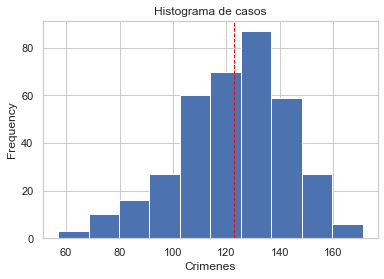

In [104]:
makeplot(año21.victimas, "Histograma de casos",
"Crimenes")

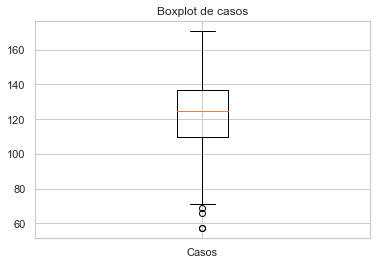

In [105]:
makeplot(año21.victimas, "Boxplot de casos",
"Casos", "box")

In [7]:
# Barrio con mas robos

bar = td.loc[td.tipo == 'Robo (con violencia)']

bar = bar.groupby(by='barrio').agg({"victimas":"count"})

maxrob = bar.sort_values(by = 'victimas', ascending = False)

maxrob.head(3)

,victimas
barrio,
Palermo,21358
Balvanera,18446
Flores,15056


In [8]:
# Barrio con menos robos

minrob = bar.sort_values(by = 'victimas', ascending = True)

minrob.head(3)

,victimas
barrio,
Puerto Madero,386
Agronomia,915
Parque Chas,918


In [9]:
# Barrio con mas homicidios

hom = td.loc[td.tipo == 'Homicidio']

hom = hom.groupby(by='barrio').agg({"victimas":"count"})

maxh = hom.sort_values(by = 'victimas', ascending = False)

maxh.head(3)



,victimas
barrio,
Flores,105
Barracas,90
Retiro,75


In [10]:
# Barrio con menos homicidios

minh = hom.sort_values(by = 'victimas', ascending = True)

minh.head(3)

,victimas
barrio,
Coghlan,1
Villa Real,3
Versalles,3


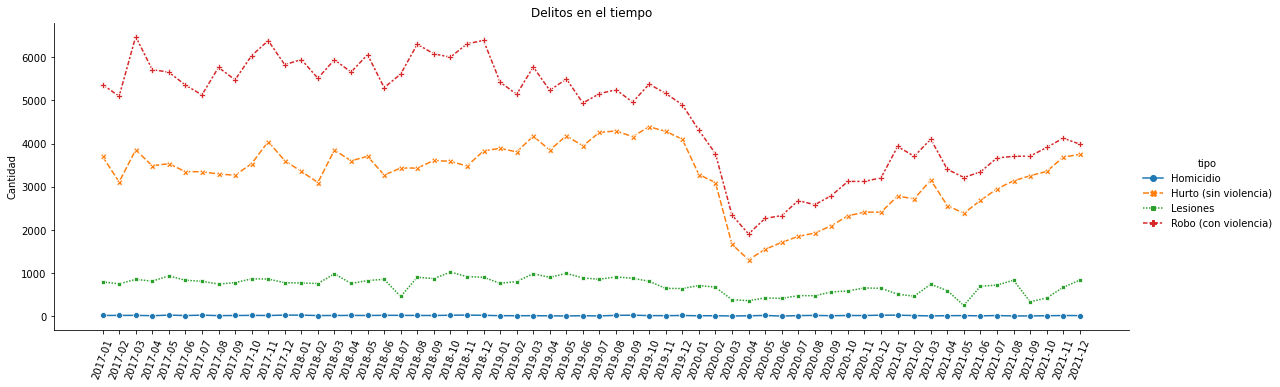

In [11]:
#Serie de tiempo de los distintos tipos de delitos

#La escala y dimensiones son correctas pero no se puede apreciar como fluctuaron los homicidios a travez del tiempo.

fdata1 = td

fdata1['fecha'] = fdata1['fecha'].dt.strftime('%Y-%m')

fdata1 = fdata1.reset_index()
fdata1 = fdata1.set_index('fecha')
fdata11 = fdata1.groupby(by=['fecha','tipo']).agg({'victimas':'count'})

sns.relplot(x="fecha", y="victimas",
            data=fdata11,
            hue="tipo",
            kind="line",
            style="tipo",
            height=5, aspect=3.2,
            markers=True
).set(
    title="Delitos en el tiempo", 
    ylabel="Cantidad",
    xlabel=None
)
plt.xticks(rotation=70)

plt.show()

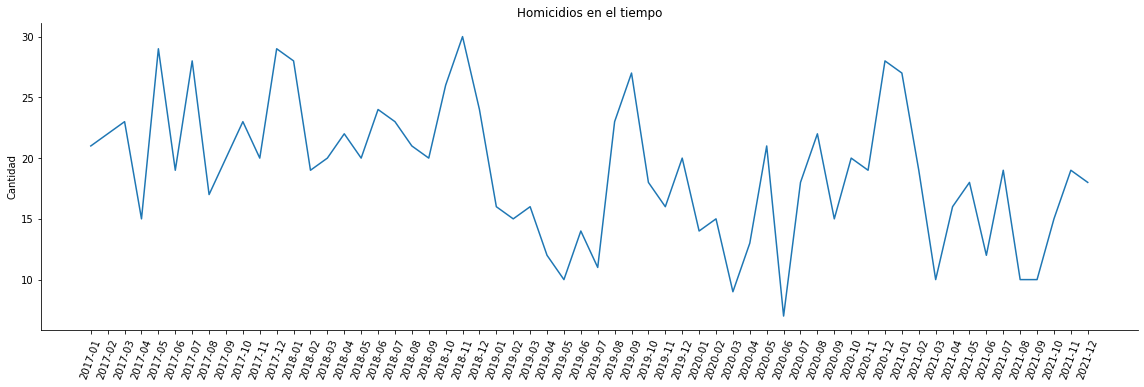

In [13]:
#Para no alterar las dimensiones y la escala, se realizó un gráfico exclusivamente de homicidios para analizar su flctuación a travez del tiempo.

fdata12 = fdata1.loc[fdata1.tipo == 'Homicidio']

fdata12 = fdata12.groupby(by='fecha').agg({'victimas':'count'})

sns.relplot(x="fecha", y="victimas",
            data=fdata12,
            kind="line",
            height=5, aspect=3.2
).set(
    title="Homicidios en el tiempo", 
    ylabel="Cantidad",
    xlabel=None
)
plt.xticks(rotation=70)

plt.show()

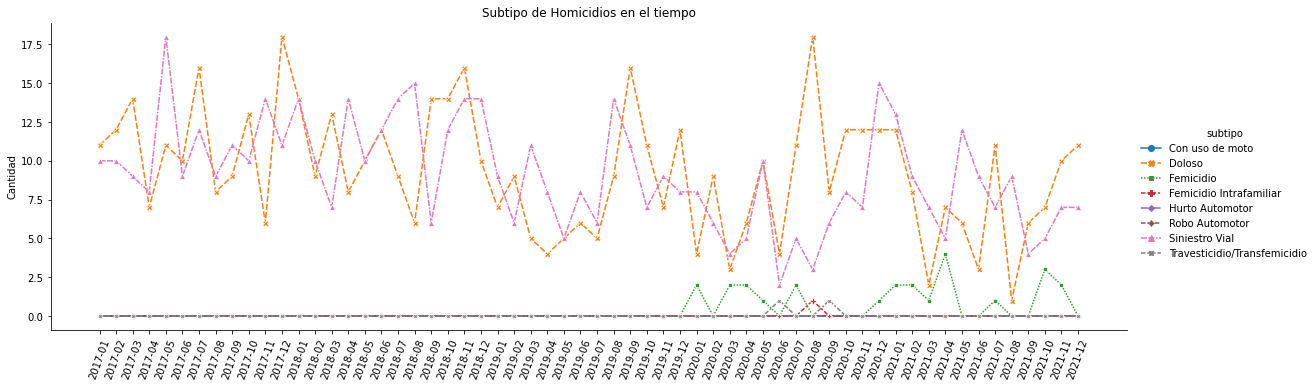

In [20]:
#Serie de tiempo de los distintos subtipos de homicidios

fdata14 = fdata1.loc[fdata1.tipo == 'Homicidio']

fdata14 = fdata14.groupby(by=['fecha','subtipo']).agg({'victimas':'count'})

sns.relplot(x="fecha", y="victimas",
            data=fdata14,
            hue="subtipo",
            kind="line",
            style="subtipo",
            height=5, aspect=3.2,
            markers=True
).set(
    title="Subtipo de Homicidios en el tiempo", 
    ylabel="Cantidad",
    xlabel=None
)
plt.xticks(rotation=70)

plt.show()

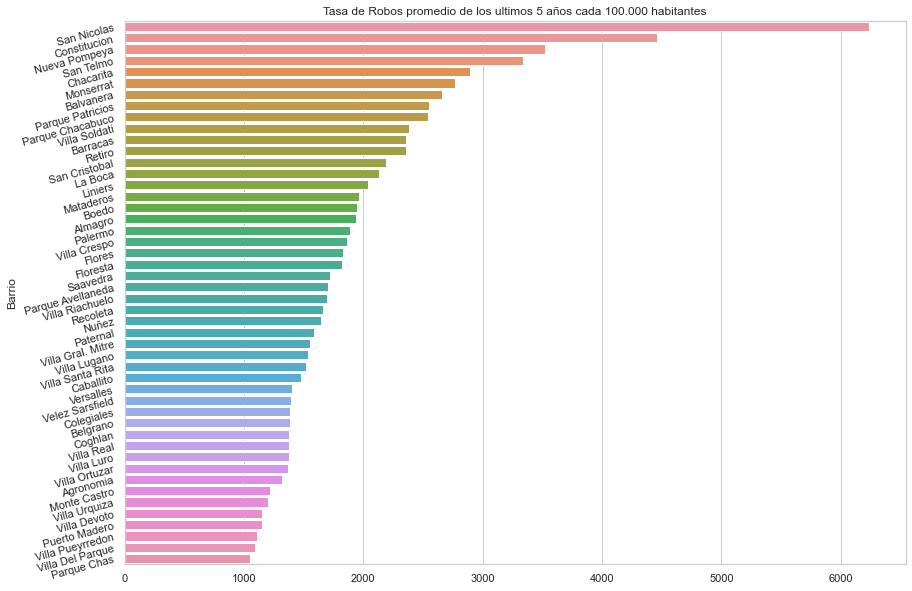

In [89]:
# Barras horizontales de tasa de Robos promedio de los ultimos 5 años cada 100.000 habitantes

td['año'] = pd.DatetimeIndex(td['fecha']).year

td['dia'] = pd.DatetimeIndex(td['fecha']).dayofweek


robos21 = td.loc[td.tipo == "Robo (con violencia)"]
robos21 = robos21.loc[robos21.año == 2021]

robos21 = robos21.groupby("barrio",dropna=False).agg({"dia":"count"})


robos20 = td.loc[td.tipo == "Robo (con violencia)"]
robos20 = robos20.loc[robos20.año == 2020]

robos20 = robos20.groupby("barrio").agg({"dia":"count"})


robos19 = td.loc[td.tipo == "Robo (con violencia)"]
robos19 = robos19.loc[robos19.año == 2019]

robos19 = robos19.groupby("barrio").agg({"dia":"count"})


robos18 = td.loc[td.tipo == "Robo (con violencia)"]
robos18 = robos18.loc[robos18.año == 2018]

robos18 = robos18.groupby("barrio").agg({"dia":"count"})


robos17 = td.loc[td.tipo == "Robo (con violencia)"]
robos17 = robos17.loc[robos17.año == 2017]

robos17 = robos17.groupby("barrio").agg({"dia":"count"})


robos = robos17.merge(robos18, how = "outer", on = "barrio", suffixes=("2017","2018")) \
                    .merge(robos19, how = "outer", on = "barrio") \
                    .merge(robos20, how = "outer", on = "barrio",suffixes=("2019","2020")) \
                    .merge(robos21, how = "outer", on = "barrio") 

robos = robos.rename(columns={'dia2017':'2017', 'dia2018':'2018', 'dia2019':'2019', 'dia2020':'2020', 'dia':'2021'})

robos = robos.reset_index()

borr = td.groupby("barrio").agg({"poblacion":"min"})

borr = borr.reset_index()

robos = borr.merge(robos, how = "outer", on = "barrio")

robos['barrio'] = robos['barrio'].astype(object)

robos = robos.fillna(0)

robos['promedio'] = robos[['2017', '2018', '2019', '2020', '2021']].mean(axis=1)

robos['Tasa de robos 100.000 promedio'] = (robos['promedio']/robos['poblacion'])*100000

robos = robos.sort_values('Tasa de robos 100.000 promedio', ascending=False)


plt.figure(figsize=(14, 10))

sns.barplot(
    x="Tasa de robos 100.000 promedio",
    y="barrio",
    data=robos
    
).set(
    title="Tasa de Robos promedio de los ultimos 5 años cada 100.000 habitantes", 
    ylabel="Barrio",
    xlabel=None
)
    
plt.yticks(rotation=15)
plt.show()

In [90]:
robos.sort_values("Tasa de robos 100.000 promedio", ascending=False).head()

,barrio,poblacion,2017,2018,2019,2020,2021,promedio,Tasa de robos 100.000 promedio
31,San Nicolas,29273.0,2392,2503,2322,931,976,1824.8,6233.730742
10,Constitucion,44107.0,2368,2297,2351,1151,1665,1966.4,4458.249257
18,Nueva Pompeya,42695.0,1689,1807,1751,1016,1250,1502.6,3519.381661
32,San Telmo,20453.0,894,848,793,353,530,683.6,3342.296974
7,Chacarita,27761.0,1041,1065,795,487,631,803.8,2895.428839


In [78]:
# Este ultimo gráfico se hizo extrayendo la cantidad de crimenes (dependiendo el tipo) y logrando un promedio desde 2017 hasta 2021
# con este epromedio se realizo una tasa de criminalidad por 100.000 habitantes.

In [91]:
# Cambio porcentual de robos a travez de los años

groupedrobos = td.loc[td.tipo == "Robo (con violencia)"]
groupedrobos = groupedrobos.groupby(["año"]).agg({"dia":"count"})
groupedrobos ["Cambio Porcentual Ratio"] = groupedrobos.dia.pct_change()
groupedrobos

,dia,Cambio Porcentual Ratio
año,,
2017,68297,NaN
2018,71121,0.041349
2019,62829,-0.116590
2020,34460,-0.451527
2021,44825,0.300784


In [93]:
# Cambio porcentual de homicidios a travez de los años

groupedhomicidios = td.loc[td.tipo == "Homicidio"]
groupedhomicidios = groupedhomicidios.groupby(["año"]).agg({"dia":"count"})
groupedhomicidios ["Cambio Porcentual Ratio"] = groupedhomicidios.dia.pct_change()
groupedhomicidios

,dia,Cambio Porcentual Ratio
año,,
2017,266,NaN
2018,277,0.041353
2019,198,-0.285199
2020,201,0.015152
2021,193,-0.039801


El dashboard completo con el análisis definitivo se encuentra en Tableau (https://public.tableau.com/app/profile/oliver.tomas/viz/DelitosCABA-CiudadAutnomadeBuenosAires/Dashboard2).